In [1]:
!pip install gsutil

     |████████████████████████████████| 2.9 MB 8.2 MB/s 
     |████████████████████████████████| 135 kB 60.0 MB/s 
     |████████████████████████████████| 96 kB 7.8 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 1.4 MB 45.2 MB/s 
     |████████████████████████████████| 3.5 MB 36.7 MB/s 
  Created wheel for gsutil: filename=gsutil-5.4-py3-none-any.whl size=3715191 sha256=9ae2e5a06bc233fc4ebb6b27fe9c94b31ffd86acab9035b47a42d76d2f1a2fdb
  Stored in directory: /root/.cache/pip/wheels/9c/d0/fb/d3706aec16bd9e26711966fe39858244ff750985a6a76f0e84
  Created wheel for gcs-oauth2-boto-plugin: filename=gcs_oauth2_boto_plugin-3.0-py3-none-any.whl size=23220 sha256=5e3fe3197954d660b6d5490c8405d35f399b1839ba767bcb814654905ab10797
  Stored in directory: /root/.cache/pip/wheels/2a/93/86/cb2140365b10150dbdba338da385c7c18c7cbd9e592e3421db
  Created wheel for retry-decorator: filename=retry_decorator-1.1.1-py2.py3-none-any.whl size=3656 sha256=4cfb646

In [2]:
!gsutil cp -r gs://ac215_project_buket/encoder4editing /content/

Copying gs://ac215_project_buket/encoder4editing/.git/HEAD...
Copying gs://ac215_project_buket/encoder4editing/.git/config...
Copying gs://ac215_project_buket/encoder4editing/.git/description...
Copying gs://ac215_project_buket/encoder4editing/.git/hooks/applypatch-msg.sample...
/ [4 files][  839.0 B/  839.0 B]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://ac215_project_buket/encoder4editing/.git/hooks/commit-msg.sample...
Copying gs://ac215_project_buket/encoder4editing/.git/hooks/fsmonitor-watchman.sample...
Copying gs://ac215_project_buket/encoder4editing/.git/hooks/post-update.sample...
Copying gs://ac215_project_buket/encoder4editing/.git/hooks/pre-applypatch.sample...
Copying gs://ac215_project_buket/encoder4editing/.

In [3]:
import os
os.chdir('/content')
CODE_DIR = 'encoder4editing'

%tensorflow_version 1.x
! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html 

!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
!sudo unzip ninja-linux.zip -d /usr/local/bin/
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force
os.chdir(f'./{CODE_DIR}')

% cd
% cd /content/

! pip install ftfy regex tqdm 
!pip install git+https://github.com/openai/CLIP.git 
! git clone https://github.com/orpatashnik/StyleCLIP

os.chdir(f'./{CODE_DIR}')

from argparse import Namespace
import time
import os
import sys
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms

sys.path.append(".")
sys.path.append("..")

from utils.common import tensor2im
from models.psp import pSp

%load_ext autoreload
%autoreload 2


TensorFlow 1.x selected.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.4 MB/s eta 0:03:53tcmalloc: large alloc 1147494400 bytes == 0x560eae106000 @  0x7f3a39355615 0x560e7598d4cc 0x560e75a6d47a 0x560e759902ed 0x560e75a81e1d 0x560e75a03e99 0x560e759fe9ee 0x560e75991bda 0x560e75a03d00 0x560e759fe9ee 0x560e75991bda 0x560e75a00737 0x560e75a82c66 0x560e759ffdaf 0x560e75a82c66 0x560e759ffdaf 0x560e75a82c66 0x560e759ffdaf 0x560e75992039 0x560e759d5409 0x560e75990c52 0x560e75a03c25 0x560e759fe9ee 0x560e75991bda 0x560e75a00737 0x560e759fe9ee 0x560e75991bda 0x560e759ff915 0x560e75991afa 0x560e759ffc0d 0x560e759fe9ee
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:26tcmalloc: large alloc 1434370048 bytes == 0x560ef275c000 @  0x7f3a39355615 0x560e7598d4cc 0x560e75a6d47a 0x560e759902ed 0x560e75a81e1d 0x560e75a03e99 0x560e759fe9ee 0x560e75991bda 0x560e75a03d00 0x560e759fe9ee 0x560e75991bda 0x560e75a00737 0x

In [4]:
sys.path.append("/content/encoder4editing")

In [5]:
dataset_name='ffhq'
# input dataset name 

% cd
% cd /content/StyleCLIP/global_directions/

# input prepare data 
!python GetCode.py --dataset_name $dataset_name --code_type 'w' 
!python GetCode.py --dataset_name $dataset_name --code_type 's' 
!python GetCode.py --dataset_name $dataset_name --code_type 's_mean_std' 

import tensorflow as tf
import numpy as np 
import torch
import clip
from PIL import Image
import pickle
import copy
from gdown import download as drive_download
import matplotlib.pyplot as plt
from MapTS import GetFs,GetBoundary,GetDt
from global_directions.manipulate import Manipulator
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device) 

M=Manipulator(dataset_name='ffhq') 
fs3=np.load('./npy/ffhq/fs3.npy')
np.set_printoptions(suppress=True)

image_path = None
img_index = None

/root
/content/StyleCLIP/global_directions
--2021-10-27 02:32:59--  https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 99.86.38.69, 99.86.38.102, 99.86.38.107, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|99.86.38.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘./model/stylegan2-ffhq-config-f.pkl’

stylegan2-ffhq-conf 100%[===================>] 363.99M   145MB/s    in 2.5s    

2021-10-27 02:33:02 (145 MB/s) - ‘./model/stylegan2-ffhq-config-f.pkl’ saved [381673535/381673535]

Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.
get all z and w
Generate S
2021-10-27 02:33:46.943140: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic lib

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 61.7MiB/s]


Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/Normalize             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656    (?, 512)             (512, 

In [6]:
!mkdir /content/encoder4editing/datasets/celeba_hq
!wget https://storage.googleapis.com/ac215_project_buket/data1024x1024.zip -P /content/encoder4editing/datasets/celeba_hq
!unzip -q /content/encoder4editing/datasets/celeba_hq/data1024x1024 -d /content/encoder4editing/datasets/celeba_hq
!mkdir /content/encoder4editing/pretrained_models
!wget https://storage.googleapis.com/ac215_project_buket/stylegan2-ffhq-config-f.pt -P /content/encoder4editing/pretrained_models
!wget https://storage.googleapis.com/ac215_project_buket/model_ir_se50.pth -P /content/encoder4editing/pretrained_models
!wget https://storage.googleapis.com/ac215_project_buket/moco_v2_800ep_pretrain.pt -P /content/encoder4editing/pretrained_models


--2021-10-27 02:34:41--  https://storage.googleapis.com/ac215_project_buket/data1024x1024.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2736368747 (2.5G) [application/zip]
Saving to: ‘/content/encoder4editing/datasets/celeba_hq/data1024x1024.zip’

data1024x1024.zip   100%[===================>]   2.55G  84.0MB/s    in 17s     

2021-10-27 02:34:58 (156 MB/s) - ‘/content/encoder4editing/datasets/celeba_hq/data1024x1024.zip’ saved [2736368747/2736368747]

mkdir: cannot create directory ‘/content/encoder4editing/pretrained_models’: File exists
--2021-10-27 02:35:35--  https://storage.googleapis.com/ac215_project_buket/stylegan2-ffhq-config-f.pt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to st

In [7]:
from gdown import download as drive_download
drive_download("https://drive.google.com/uc?id=1O8OLrVNOItOJoNGMyQ8G8YRTeTYEfs0P", "/content/encoder4editing/e4e_ffhq_encode.pt", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1O8OLrVNOItOJoNGMyQ8G8YRTeTYEfs0P
To: /content/encoder4editing/e4e_ffhq_encode.pt
100%|██████████| 1.20G/1.20G [00:09<00:00, 130MB/s] 


'/content/encoder4editing/e4e_ffhq_encode.pt'

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 9.7 GB  |     Proc size: 4.5 GB
GPU RAM Free: 2810MB | Used: 8631MB | Util  75% | Total     11441MB


In [9]:
torch.cuda.empty_cache()
!python /content/encoder4editing/scripts/train.py \
--dataset_type celeba_hq \
--exp_dir /content/experiment4 \
--checkpoint_path e4e_ffhq_encode.pt \
--w_discriminator_lambda 0.1 \
--progressive_start 20000 \
--save_interval 25 \
--id_lambda 0.5 \
--val_interval 10000 \
--max_steps 200000 \
--stylegan_size 256 \
--stylegan_weights /content/encoder4editing/pretrained_models/stylegan2-ffhq-config-f.pt \
--workers 8 \
--batch_size 4 \
--test_batch_size 2 \
--test_workers 4 

{'batch_size': 4,
 'board_interval': 50,
 'checkpoint_path': 'e4e_ffhq_encode.pt',
 'd_reg_every': 16,
 'dataset_type': 'celeba_hq',
 'delta_norm': 2,
 'delta_norm_lambda': 0.0002,
 'encoder_type': 'Encoder4Editing',
 'exp_dir': '/content/experiment4',
 'id_lambda': 0.5,
 'image_interval': 100,
 'keep_optimizer': False,
 'l2_lambda': 1.0,
 'learning_rate': 0.0001,
 'lpips_lambda': 0.8,
 'lpips_type': 'alex',
 'max_steps': 200000,
 'optim_name': 'ranger',
 'progressive_start': 20000,
 'progressive_step_every': 2000,
 'progressive_steps': [0,
                       20000,
                       22000,
                       24000,
                       26000,
                       28000,
                       30000,
                       32000,
                       34000,
                       36000,
                       38000,
                       40000,
                       42000,
                       44000],
 'r1': 10,
 'resume_training_from_ckpt': None,
 'save_interval

In [13]:
#title e4e setup
#e4e setup 
experiment_type = 'ffhq_encode'

os.chdir('/content/encoder4editing')

EXPERIMENT_ARGS = {
        "model_path": "/content/experiment4/checkpoints/iteration_4000.pt"
    }
EXPERIMENT_ARGS['transform'] = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
resize_dims = (256, 256)

model_path = EXPERIMENT_ARGS['model_path']
ckpt = torch.load(model_path, map_location='cpu')
opts = ckpt['opts']
print(opts)  # Display full options used
# update the training options
opts['checkpoint_path'] = model_path
opts= Namespace(**opts)
net = pSp(opts)
net.eval()
net.cuda()
print('Model successfully loaded!')

{'exp_dir': '/content/experiment4', 'dataset_type': 'celeba_hq', 'encoder_type': 'Encoder4Editing', 'batch_size': 4, 'test_batch_size': 2, 'workers': 8, 'test_workers': 4, 'learning_rate': 0.0001, 'optim_name': 'ranger', 'train_decoder': False, 'start_from_latent_avg': False, 'lpips_type': 'alex', 'lpips_lambda': 0.8, 'id_lambda': 0.5, 'l2_lambda': 1.0, 'stylegan_weights': '/content/encoder4editing/pretrained_models/stylegan2-ffhq-config-f.pt', 'stylegan_size': 256, 'checkpoint_path': 'e4e_ffhq_encode.pt', 'max_steps': 200000, 'image_interval': 100, 'board_interval': 50, 'val_interval': 10000, 'save_interval': 25, 'w_discriminator_lambda': 0.1, 'w_discriminator_lr': 2e-05, 'r1': 10, 'd_reg_every': 16, 'use_w_pool': False, 'w_pool_size': 50, 'delta_norm': 2, 'delta_norm_lambda': 0.0002, 'progressive_steps': [0, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000], 'progressive_start': 20000, 'progressive_step_every': 2000, 'save_training_data': Fals

Aligned image has shape: (256, 256)


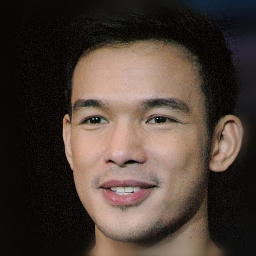

In [14]:
image_path = "notebooks/images/input_img.jpg"
original_image = Image.open(image_path)
original_image = original_image.convert("RGB")
if experiment_type == "ffhq_encode" and 'shape_predictor_68_face_landmarks.dat' not in os.listdir():
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

def run_alignment(image_path):
  import dlib
  from utils.alignment import align_face
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  aligned_image = align_face(filepath=image_path, predictor=predictor) 
  print("Aligned image has shape: {}".format(aligned_image.size))
  return aligned_image 

if experiment_type == "ffhq_encode":
  input_image = run_alignment(image_path)
else:
  input_image = original_image

input_image.resize(resize_dims)


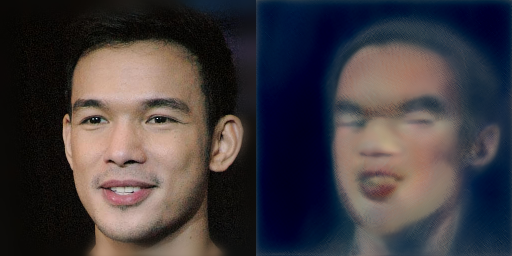

In [15]:
img_transforms = EXPERIMENT_ARGS['transform']
transformed_image = img_transforms(input_image)

def display_alongside_source_image(result_image, source_image):
    res = np.concatenate([np.array(source_image.resize(resize_dims)),
                          np.array(result_image.resize(resize_dims))], axis=1)
    return Image.fromarray(res)

def run_on_batch(inputs, net):
    images, latents = net(inputs.to("cuda").float(), randomize_noise=False, return_latents=True)
    if experiment_type == 'cars_encode':
        images = images[:, :, 32:224, :]
    return images, latents

with torch.no_grad():
    images, latents = run_on_batch(transformed_image.unsqueeze(0), net)
    result_image, latent = images[0], latents[0]
torch.save(latents, 'latents.pt')

# Display inversion:
display_alongside_source_image(tensor2im(result_image), input_image)
